In [1]:
import load_data
import feature_attender
from sklearn.linear_model import LassoCV
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error

'''select  grp(BD orHC)
feature_types is the input features you want
B_1 is Dass-21 
B_2 is Altman
C is daily valence
E is daily 7 emotions
'''
dir_grp = 'BD'
feature_types = ['B_1','B_2','C','D','E']
attenders = feature_attender.get_wanna_attender(dir_grp,feature_types)

print(dir_grp,'attenders:',len(attenders))
# get input feature and scale (target_scale = 'ymrs' or 'hamd')
# each scale label is 8 dimension (7 factor and 1 total score of HAMD)
x, label = load_data.loading_data(dir_grp,attenders,feature_types,target_scale='hamd')
print('res', x.shape, label.shape)



Counting the type B_1
attender size: (483, 1)
-----------------------------------------------
Counting the type B_2
attender size: (492, 1)
-----------------------------------------------
Counting the type C
attender size: (400, 1)
-----------------------------------------------
Counting the type D
attender size: (366, 1)
-----------------------------------------------
Counting the type E
attender size: (335, 1)
-----------------------------------------------
BD attenders: 201
max (56,)
min (56,)
res: (201, 56)
x: (201, 56)
label: (201, 8)
res (201, 56) (201, 8)


extract factors

In [2]:
def neg_zero( L):
    for i in range( len(L)):
        if L[i] < 0:
            L[i] = 0
    return L

In [3]:

def get_alpha(x_,h_):
    global alpha_
    global check
    x_train = np.nan_to_num( x_)
    y_train = h_
    lassoCV = LassoCV(cv=10)
    lassoCV.fit( x_train, y_train)
    alpha_ = lassoCV.alpha_
    return alpha_

def Lasso_Regression(X_train,target):
    model = linear_model.Lasso(alpha=get_alpha(X_train,target))
    model.fit(X_train,target)
    return model

5-fold 

In [4]:
import numpy as np
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, random_state=None, shuffle=True)
core_mae = []
c_core_mae = []
s_mae = []
a_mae = []
pa_mae = []
sa_mae = []
d_mae = []
ts_mae = []
#weight
core_w = []
c_core_w = []
s_w = []
a_w = []
pa_w = []
sa_w = []
d_w = []
ts_w = []

for train_index, test_index in kf.split(x):
    X_test =  x[test_index]
    y_test =  label[test_index]
    
    X_train =  x[train_index]
    y_train =  label[train_index]

    #
    print('X train:',X_train.shape)
    print('X test:',X_test.shape)
    print('Y train:',y_train.shape)
    print('Y test:',y_test.shape)
    core_train = y_train[:,0]
    c_core_train = y_train[:,1]
    s_train = y_train[:,2]
    a_train = y_train[:,3]
    pa_train = y_train[:,4]
    sa_train = y_train[:,5]
    d_train = y_train[:,6]
    ts_train = y_train[:,7]
    
    core_test = y_test[:,0]
    c_core_test = y_test[:,1]
    s_test = y_test[:,2]
    a_test = y_test[:,3]
    pa_test = y_test[:,4]
    sa_test = y_test[:,5]
    d_test = y_test[:,6]
    ts_test = y_test[:,7]

    #train
    model1 = Lasso_Regression(X_train,core_train)
    model2 = Lasso_Regression(X_train,c_core_train)
    model3 = Lasso_Regression(X_train,s_train)
    model4 = Lasso_Regression(X_train,a_train)
    model5 = Lasso_Regression(X_train,pa_train)
    model6 = Lasso_Regression(X_train,sa_train)
    model7 = Lasso_Regression(X_train,d_train)
    model8 = Lasso_Regression(X_train,ts_train)
    core_w.append(model1.coef_)
    c_core_w.append(model2.coef_)
    s_w.append(model3.coef_)
    a_w.append(model4.coef_)
    pa_w.append(model5.coef_)
    sa_w.append(model6.coef_)
    d_w.append(model7.coef_)
    ts_w.append(model8.coef_)
    #eva
    predict_y = model1.predict( X_test)
    predict_core = np.array(predict_y).astype(int)
    predict_y = model2.predict( X_test)
    predict_c_core = np.array(predict_y).astype(int)
    predict_y = model3.predict( X_test)
    predict_s = np.array(predict_y).astype(int)
    predict_y = model4.predict( X_test)
    predict_a = np.array(predict_y).astype(int)
    predict_y = model5.predict( X_test)
    predict_pa = np.array(predict_y).astype(int)
    predict_y = model6.predict( X_test)
    predict_sa = np.array(predict_y).astype(int)
    predict_y = model7.predict( X_test)
    predict_d = np.array(predict_y).astype(int)
    predict_y = model8.predict( X_test)
    predict_ts = np.array(predict_y).astype(int)
    
    core_rmae = mean_absolute_error( core_test, model1.predict( X_test))
    c_core_rmae = mean_absolute_error( c_core_test, model2.predict( X_test))
    s_rmae = mean_absolute_error( s_test, model3.predict( X_test))
    a_rmae = mean_absolute_error( a_test, model4.predict( X_test))
    pa_rmae = mean_absolute_error( pa_test, model5.predict( X_test))
    sa_rmae = mean_absolute_error( sa_test, model6.predict( X_test))
    d_rmae = mean_absolute_error( d_test, model7.predict( X_test))
    ts_rmae = mean_absolute_error( ts_test, model8.predict( X_test))
    
    core_mae.append(core_rmae)
    c_core_mae.append(c_core_rmae)
    s_mae.append(s_rmae)
    a_mae.append(a_rmae)
    pa_mae.append(pa_rmae)
    sa_mae.append(sa_rmae)
    d_mae.append(d_rmae)
    ts_mae.append(ts_rmae)
core_mean = sum(core_mae) / len(core_mae)
core_std = np.std(core_mae)
print('core: %.2f ± %.2f' % (core_mean, core_std))
c_core_mean = sum(c_core_mae) / len(c_core_mae)
c_core_std = np.std(c_core_mae)
print('c_core: %.2f ± %.2f' % (c_core_mean, c_core_std))
s_mean = sum(s_mae) / len(s_mae)
s_std = np.std(s_mae)
print('s: %.2f ± %.2f' % (s_mean, s_std))
a_mean = sum(a_mae) / len(a_mae)
a_std = np.std(a_mae)
print('a: %.2f ± %.2f' % (a_mean, a_std))
pa_mean = sum(pa_mae) / len(pa_mae)
pa_std = np.std(pa_mae)
print('pa: %.2f ± %.2f' % (pa_mean, pa_std))
sa_mean = sum(sa_mae) / len(sa_mae)
sa_std = np.std(sa_mae)
print('sa: %.2f ± %.2f' % (sa_mean, sa_std))
d_mean = sum(d_mae) / len(d_mae)
d_std = np.std(d_mae)
print('d: %.2f ± %.2f' % (d_mean, d_std))

ts_mean = sum(ts_mae) / len(ts_mae)
ts_std = np.std(ts_mae)
print('ts: %.2f ± %.2f' % (ts_mean, ts_std))

X train: (160, 56)
X test: (41, 56)
Y train: (160, 8)
Y test: (41, 8)
X train: (161, 56)
X test: (40, 56)
Y train: (161, 8)
Y test: (40, 8)
X train: (161, 56)
X test: (40, 56)
Y train: (161, 8)
Y test: (40, 8)
X train: (161, 56)
X test: (40, 56)
Y train: (161, 8)
Y test: (40, 8)
X train: (161, 56)
X test: (40, 56)
Y train: (161, 8)
Y test: (40, 8)
core: 0.86 ± 0.09
c_core: 0.60 ± 0.03
s: 0.62 ± 0.04
a: 0.42 ± 0.04
pa: 0.56 ± 0.06
sa: 0.65 ± 0.08
d: 0.57 ± 0.05
ts: 1.92 ± 0.19


Multi-task learning

In [5]:
Avg_mae = np.concatenate([core_mae,c_core_mae,s_mae,a_mae,pa_mae,sa_mae,d_mae,ts_mae])
#print(Avg_mae)
print('Avg: %.2f ± %.2f' % (sum(Avg_mae)/len(Avg_mae),np.std(Avg_mae)))

Avg: 0.78 ± 0.46


draw model structure

In [6]:
Avg_mae = np.concatenate([core_mae,c_core_mae,s_mae,a_mae,pa_mae,sa_mae,d_mae])
#print(Avg_mae)
print('Avg: %.2f ± %.2f' % (sum(Avg_mae)/len(Avg_mae),np.std(Avg_mae)))

Avg: 0.61 ± 0.14


training

In [7]:
f_core_w = np.mean(core_w, axis=0)
f_c_core_w = np.mean(c_core_w, axis=0)
f_s_w = np.mean(s_w, axis=0)
f_a_w = np.mean(a_w, axis=0)
f_pa_w = np.mean(pa_w, axis=0)
f_sa_w = np.mean(sa_w, axis=0)
f_d_w = np.mean(d_w, axis=0)
f_ts_w = np.mean(ts_w, axis=0)

In [8]:
import matplotlib.pyplot as plt

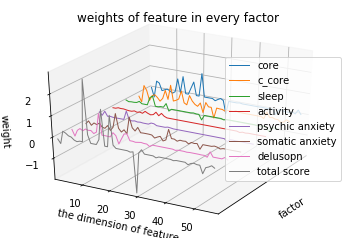

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure('graph')
ax = fig.add_subplot(111, projection='3d') 

ax.set_title(r'weights of feature in every factor')
x_axis = np.arange(1,57,1)
#plt.plot(x_axis , f_s_w ,color = 'b', label="sleep")
factor_dim = np.full(56,1)
ax.plot(factor_dim, x_axis , f_core_w, linewidth=1, label=r'core')
factor_dim = np.full(56,3)
ax.plot(factor_dim, x_axis , f_c_core_w, linewidth=1, label=r'c_core')
factor_dim = np.full(56,5)
ax.plot(factor_dim, x_axis , f_s_w, linewidth=1, label=r'sleep')
factor_dim = np.full(56,7)
ax.plot(factor_dim, x_axis , f_a_w, linewidth=1, label=r'activity')
factor_dim = np.full(56,9)
ax.plot(factor_dim, x_axis , f_pa_w, linewidth=1, label=r'psychic anxiety')
factor_dim = np.full(56,11)
ax.plot(factor_dim, x_axis , f_sa_w, linewidth=1, label=r'somatic anxiety')
factor_dim = np.full(56,13)
ax.plot(factor_dim, x_axis , f_d_w, linewidth=1, label=r'delusopn')
factor_dim = np.full(56,15)
ax.plot(factor_dim, x_axis , f_ts_w, linewidth=1, label=r'total score')

ax.set_ylim(1, 57)
ax.set_xlim(1, 15)
ax.legend(loc=5)
ax.set_xlabel('factor')
ax.set_ylabel('the dimension of feature')
ax.set_zlabel('weight')
#ax.text(0, 0, 0, 'x')  # (0,0,0)
ax.view_init(0,0)
#ax.view_init(30, -60)
ax.set_xticks([]) 
ax.view_init(30, 30)
plt.show()

In [13]:
def avg_of_w_in_type(weight):
    abs_weights = np.absolute(weight)
    dimension_in_feature=[28,2,12,14]
    res_weight=np.zeros(len(dimension_in_feature))
    idx=0
    for d in range(len(dimension_in_feature)):
        if idx!=0:
            idx+=1
        for i in range(0,dimension_in_feature[d]):
            res_weight[d]+=abs_weights[idx+i]
        res_weight[d]/=dimension_in_feature[d]
        idx+=dimension_in_feature[d]-1
    print(res_weight)
    return res_weight

[0.17927405 0.31050944 0.00284694 0.03925719]
res [0.17927405 0.31050944 0.00284694 0.03925719]
[0.17364551 0.25488963 0.00968627 0.04769963]
[0.05122083 0.12161334 0.00351521 0.01762886]
[0.03003256 0.         0.         0.00411057]
[3.81588364e-02 0.00000000e+00 5.42356545e-06 8.56233918e-03]
[0.11062342 0.15325827 0.07073959 0.00706261]
[0.11062342 0.15325827 0.07073959 0.00706261]
[0.28963087 0.96519782 0.022945   0.04510088]


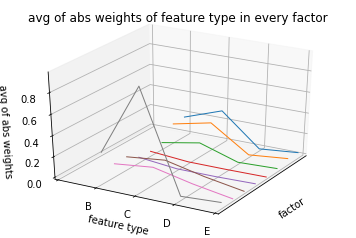

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure('graph')
ax = fig.add_subplot(111, projection='3d') 

ax.set_title(r'avg of abs weights of feature type in every factor')
res_each_factor=[]
#plt.plot(x_axis , f_s_w ,color = 'b', label="sleep")
x_axis = np.arange(1,5,1)

factor_dim = np.full(4,1)

res = avg_of_w_in_type(f_core_w)
res_each_factor.append(res)
print('res',res)
ax.plot(factor_dim, x_axis , res, linewidth=1, label=r'core')

factor_dim = np.full(4,1.5)
res = avg_of_w_in_type(f_c_core_w)
res_each_factor.append(res)
ax.plot(factor_dim, x_axis , res, linewidth=1, label=r'c_core')

factor_dim = np.full(4,2)
res = avg_of_w_in_type(f_s_w)
res_each_factor.append(res)
ax.plot(factor_dim, x_axis , res, linewidth=1, label=r'sleep')

factor_dim = np.full(4,2.5)
res = avg_of_w_in_type(f_a_w)
res_each_factor.append(res)
ax.plot(factor_dim, x_axis , res, linewidth=1, label=r'activity')

factor_dim = np.full(4,3)
res = avg_of_w_in_type(f_pa_w)
res_each_factor.append(res)                      
ax.plot(factor_dim, x_axis , res, linewidth=1, label=r'psychic anxiety')

factor_dim = np.full(4,3.5)
res = avg_of_w_in_type(f_sa_w)
res_each_factor.append(res)                       
ax.plot(factor_dim, x_axis , res, linewidth=1, label=r'somatic anxiety')

factor_dim = np.full(4,4)
res = avg_of_w_in_type(f_sa_w)
res_each_factor.append(res)
ax.plot(factor_dim, x_axis , res, linewidth=1, label=r'delusopn')

factor_dim = np.full(4,4.5)
res = avg_of_w_in_type(f_ts_w)
res_each_factor.append(res)
ax.plot(factor_dim, x_axis , res, linewidth=1, label=r'total score')

#ax.legend(loc=1)
ax.set_xlabel('factor')
ax.set_ylabel('feature type')
ax.set_zlabel('avg of abs weight')
#ax.text(0, 0, 0, 'x')  # (0,0,0)
ax.view_init(0,0)

ax.set_ylim(0, 4)
#ax.legend(loc=1)
ax.set_xlabel('factor')
ax.set_ylabel('feature type')
ax.set_zlabel('avg of abs weights')
#ax.text(0, 0, 0, 'x')  # (0,0,0)
ax.view_init(0,0)
#该函数接受两个参数，第一个参数是竖直旋转，第二个参数是水平旋转，旋转单位是度°
ax.set_xticks([])
ax.set_yticks((0,1,2,3,4))
ax.set_yticklabels((" ","B","C","D","E"))
ax.view_init(30, 30) 
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure('graph')
ax = fig.add_subplot(111, projection='3d') 

ax.set_title(r'avg of abs weights of feature type in every factor')

res_each_factor=[]
#plt.plot(x_axis , f_s_w ,color = 'b', label="sleep")
x_axis = np.arange(1,5,1)

factor_dim = np.full(4,1)
res = avg_of_w_in_type(f_pm_w)
res_each_factor.append(res)
ax.plot(factor_dim, x_axis , res, linewidth=1, label=r'psychotic mania')
factor_dim = np.full(4,1.5)
res = avg_of_w_in_type(f_im_w)
res_each_factor.append(res)
ax.plot(factor_dim, x_axis , res, linewidth=1, label=r'irritable mania')
factor_dim = np.full(4,2)
res = avg_of_w_in_type(f_em_w)
res_each_factor.append(res)
ax.plot(factor_dim, x_axis , res, linewidth=1, label=r'elated mania')
factor_dim = np.full(4,2.5)
res = avg_of_w_in_type(f_ts_w)
res_each_factor.append(res)
ax.plot(factor_dim, x_axis , res, linewidth=1, label=r'total score')

ax.set_ylim(0, 4)
#ax.legend(loc=1)
ax.set_xlabel('factor')
ax.set_ylabel('feature type')
ax.set_zlabel('avg of abs weights')
#ax.text(0, 0, 0, 'x')  # (0,0,0)
ax.view_init(0,0)
#该函数接受两个参数，第一个参数是竖直旋转，第二个参数是水平旋转，旋转单位是度°
ax.set_xticks([])
ax.set_yticks((0,1,2,3,4))
ax.set_yticklabels((" ","B","C","D","E"))
ax.view_init(30, 30)
#plt.savefig('facotor_result/ymrs_3d'+file_grp+'.png') 
plt.show()

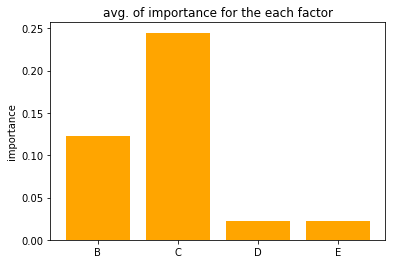

In [15]:
res_each_factor = np.array(res_each_factor)
each_weights_in_type = np.mean(res_each_factor, axis=0)
x_axis = np.arange(1,5,1)
plt.title(r'avg. of importance for the each factor')
plt.bar(x_axis , each_weights_in_type ,color = 'orange', label="weight")
#plt.xlabel('feature type')
plt.ylabel('importance')
plt.xticks([])
x_ori = [1,2,3,4]
labels = ['B','C','D','E']
plt.xticks(x_axis, labels)
plt.show()